### 차원(dimension)
차원이란, 어떤 공간에 존재하는 데이터들을 식별하는 데에 필요한 최소한의 좌표값 개수이다.  
즉 2차원 공간의 점들은 2개의 좌표값으로 표현하게 된다.  
일반적으로 차원은 크기를 비교할 수 있는 공간으로 가정하기 때문에  
만약 사람의 정보를 (키, 몸무게, 이름)으로 표현한다면 3차원이 아니라  
(키, 몸무게)라는 2차원 데이터에 각각 (이름)이 속성으로 부여된 것으로 볼 수 있다.

데이터를 다룰 때 차원이 높다는 것은 데이터를 표현하는 특징의 수가 많다는 의미이므로  
차원이 높을수록 데이터를 더 잘 나타내어 좋을 것 같지만, 실제로는 여러가지 문제가 발생할 수 있다.  

### 차원의 저주(curse of dimensionality)
데이터의 차원이 높아지면 데이터들이 공간의 경계에 몰리는 경향이 있다.  
즉, 데이터의 사이의 공간이 멀어지면서 데이터의 밀도가 낮아지게 되고  
데이터들 사이의 관계를 파악하는 것이 어려워지는데, 이것을 차원의 저주라 부른다.

### 차원축소(dimension reduction)
따라서 많은 특징들 중 중요하지 않은 차원을 생략하는 차원축소가 필요하다.  
차원을 축소하면 필연적으로 정보손실이 생길 수밖에 없지만, 분석의 효율을 위해서는 차원을 축소해야 한다.  
#### => 정보손실을 최소로 하면서 특징의 수를 줄이려면?
+ 특징선택(feature selection)
    + 거의 변화가 없거나 관련성이 낮고 중복되거나 불필요한 정보를 담은 차원을 버리고, 중요한 차원만 선택하는 가장 단순한 방법
    + 데이터를 낮은 차원으로 떨어뜨리는 것을 투영(projection)이라고 하는데  
    원본 데이터의 분산을 최대로 유지하면서 투영이 일어나게 하는 것이 목표이다.
+ 직교투영
    + 축을 하나 제외하는 가장 간단한 형태의 투영
+ 주성분분석(PCA, principal component analysis)
    + 데이터의 분산을 가장 잘 유지하는 축들을 주성분이라고 한다.
    + 일반적으로 특이값 분해(SVD, singular value decomposition) 방법으로 구현한다.
    1. 분산을 최대로 유지하는 축 찾기
    2. 1번의 축에 직교하면서, 남은 분산을 최대로 유지하는 축 찾기
    3. 원하는 차원에 도달할 때까지 2번을 반복  
    => k번째 주성분은 이전의 k-1개의 주성분과 모두 직교하면서 데이터의 분산을 가장 잘 보존하는 축    

### Quiz.
3차원 공간의 데이터에서 주성분을 찾아보자.  
numpy의 선형대수 서부모듈인 linalg에서 특이값분해를 수행하는 svd() 메소드를 사용하면 간단히 주성분을 찾아낼 수 있다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

u = np.array([1,1,1]) / np.sqrt(3)
v = np.array([1,0,-1]) / np.sqrt(2)

n_data = 1000
X = []
for i in range(n_data):
    r_coef = np.random.randn(2,)   #평균 0, 표준편차 1인 가우시안 표준정규분포 난수의 행렬 [2,] 생성
    data = (2.0 * r_coef[0] * u) + (r_coef[1] * v) + (0.1 * np.random.randn(3,))
    X.append(data)
    
X = np.array(X)
X.shape

c:\Users\yeonok\anaconda3\envs\deeplearning\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\yeonok\anaconda3\envs\deeplearning\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\yeonok\anaconda3\envs\deeplearning\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


(1000, 3)

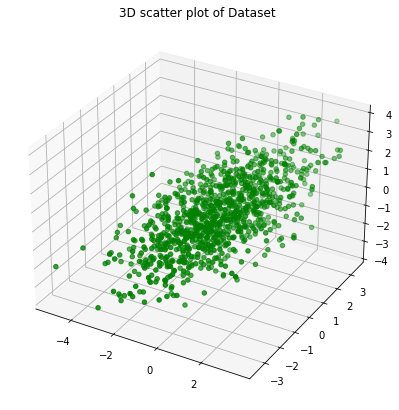

In [2]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], color='g')
plt.title('3D scatter plot of Dataset');

In [3]:
#데이터가 원점을 기준으로 배치되도록해 분산 방향 찾기

X_adj = X - X.mean(axis=0)        #평균을 빼 데이터 중심을 원점으로 옮기기
U, S, Vt = np.linalg.svd(X_adj)   #특이값분해 실행

Vt.T   #주성분을 담고있는 행렬

array([[ 0.5626684 , -0.71975747, -0.40663676],
       [ 0.57848382, -0.0085837 ,  0.81564869],
       [ 0.59055969,  0.69417253, -0.41153828]])

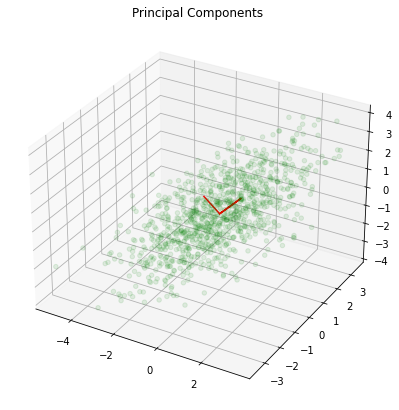

In [4]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], color='g', alpha=0.1)   #불투명도 0.1
plt.title('Principal Components')

origin = np.zeros((1,3))                             #원점좌표 [[0., 0., 0.]]
C = np.concatenate((origin, Vt[0,:].reshape(-1,3),   #주성분을 나타내는 벡터(방향벡터 2개)를 그리기 위한 좌표 생성
                    origin, Vt[1,:].reshape(-1,3)), axis=0)
ax.plot3D(C[:,0], C[:,1], C[:,2], color='r');

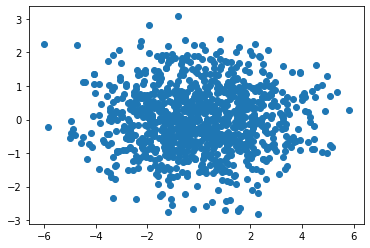

In [5]:
#3차원 데이터를 2차원으로 그려보기
W_2d = Vt.T[:, :2]
X_2d = X_adj.dot(W_2d)
plt.scatter(X_2d[:,0], X_2d[:,1]);

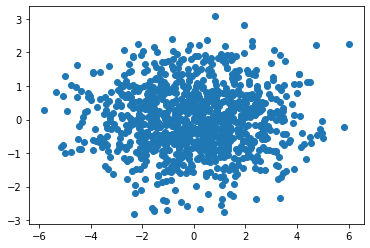

In [6]:
#sklearn의 decomposition 서브모듈에서 PCA 클래스 사용해보기
from sklearn.decomposition import PCA

pca = PCA(n_components=2)    #주성분 2개를 가지는 PCA 클래스 객체 생성
X_2d_sklearn = pca.fit_transform(X)     
plt.scatter(X_2d_sklearn[:,0], X_2d_sklearn[:,1]);

### 커널 PCA
10_SVM.ipynb에서 커널 트릭을 사용해보았는데, 특징 공간을 다항화하지 않고도 비슷한 효과를 얻을 수 있었다.  
이 커널 트릭을 주성분분석에도 똑같은 방식으로 적용할 수 있다.  
sklearn의 KernalPCA 클래스를 사용하면 된다.
+ gamma, degree, coef0 지정

In [7]:
#말린 형태의 3차원 점 데이터를 만드는 함수
def make_a_roll(num_data):
    f = 3
    len_unit = np.linspace(0, 1, num_data)
    t = f * len_unit * 3.14    #x, z 좌표가 점점 밖으로 벗어나며 회전하게 하는 매개변수
    
    x = np.sin(t) * (len_unit+0.5) + np.random.randn(num_data)*0.01
    z = np.cos(t) * len_unit + np.random.randn(num_data)*0.01
    y = + np.random.randn(num_data) * 0.3  #큰 범위로 난수를 생성해 띠 형성
    
    #각 데이터의 색 => 시작할 때는 b, 중간에는 g, 마지막에는 r이 강하도록
    r = len_unit
    g = -(2 * (len_unit-0.5))**2 + 1
    b = 1 - len_unit
    
    X = np.array([x, y, z])
    C = np.array([r, g, b])
    return X.T, C.T

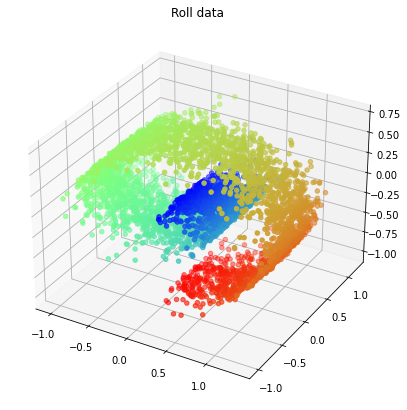

In [8]:
X, color = make_a_roll(5000)

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], color=color)
plt.title('Roll data');

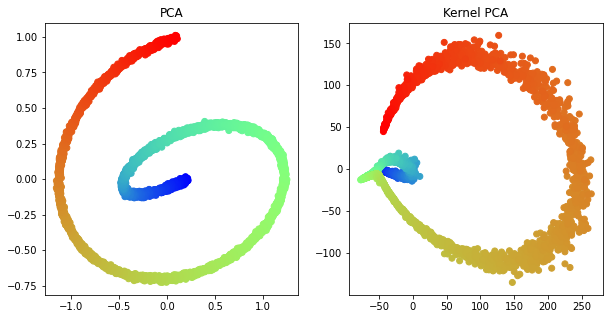

In [9]:
from sklearn.decomposition import KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(n_components=2, kernel='polynomial',    #다항커널 사용
                       gamma=3.5, degree=5, coef0=3.5)

X_2d = pca.fit_transform(X)
X_2d_kernel = kernel_pca.fit_transform(X)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.scatter(X_2d[:,0], X_2d[:,1], color=color)
ax1.set_title('PCA')
ax2.scatter(X_2d_kernel[:,0], X_2d_kernel[:,1], color=color)
ax2.set_title('Kernel PCA');

### 다양한 커널의 적용
sklearn.decomposition.KernelPCA()의 kernel 파라미터에 다양한 커널트릭 종류를 지정할 수 있다.  
+ 'polynomial' : 다항커널
+ 'rbf' : 방사 기저 함수 커널(radial basis function), gamma 값만 지정
+ 'sigmoid' : gamma, coef0 값 지정
+ 'cosine' : 커널 이름만 지정하면 됨

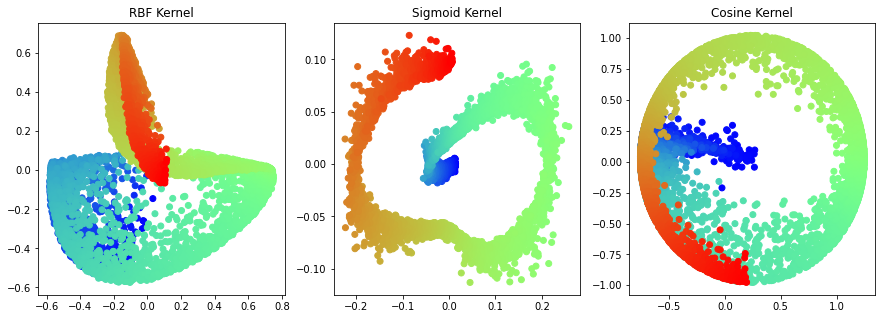

In [10]:
rbf = KernelPCA(n_components=2, kernel='rbf', gamma=2.2)
sigmoid = KernelPCA(n_components=2, kernel='sigmoid', gamma=1.1, coef0=3.0)
cosine = KernelPCA(n_components=2, kernel='cosine')

rbf_X_2d = rbf.fit_transform(X)
sigmoid_X_2d = sigmoid.fit_transform(X)
cosine_X_2d = cosine.fit_transform(X)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
ax1.scatter(rbf_X_2d[:,0], rbf_X_2d[:,1], color=color)
ax1.set_title('RBF Kernel')
ax2.scatter(sigmoid_X_2d[:,0], sigmoid_X_2d[:,1], color=color)
ax2.set_title('Sigmoid Kernel')
ax3.scatter(cosine_X_2d[:,0], cosine_X_2d[:,1], color=color)
ax3.set_title('Cosine Kernel');

다양한 커널에 의해 다양한 방식으로 차원 축소가 이루어진 것을 볼 수 있다.

### Quiz.
주성분을 추출해 이미지를 압축하고 복원해보자.  
28x28 이미지를 펼치면 784차원의 벡터 형태가 되는데, PCA를 통해 100개의 주성분을 뽑아낸다.  
그 뒤 주성분이 표현하는 공간으로 투영해 100개의 원소를 가진 벡터, 즉 100차원 데이터로 축소한다.  
그리고 투영을 역으로 적용하면 압축된 이미지를 다시 복원할 수 있을 것이다.

In [11]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [12]:
def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize=(nCol, nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1:
                axis = ax[j]
            else:
                axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol + j], cmap=cmap)

<Figure size 432x288 with 0 Axes>

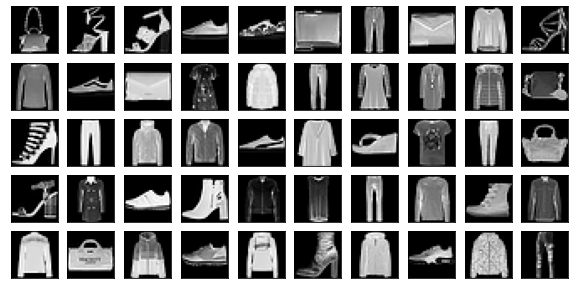

In [13]:
#랜덤 인덱스부터 50개 이미지 그려보기
random_index = np.random.randint(0, len(x_train) - 50)
samples = x_train[random_index:random_index+50]

plot_images(5,10,samples)

In [14]:
#데이터의 분산을 가장 잘 나타내는 주성분 찾기
from sklearn.decomposition import PCA

print(f'원본 데이터 형태 : {x_train.shape}')
x_train_flat = x_train.reshape(-1, 28*28)
print(f'데이터 펼친 후 형태 : {x_train_flat.shape}')

#784차원을 100차원으로 축소
pca = PCA(n_components=100)

reduced_x_train = pca.fit_transform(x_train_flat)
print(f'PCA 후 형태 : {reduced_x_train.shape}')   #28*28 이미지에서 10*10 으로 축소됐다고 볼 수 있음

원본 데이터 형태 : (60000, 28, 28)
데이터 펼친 후 형태 : (60000, 784)
PCA 후 형태 : (60000, 100)


<Figure size 432x288 with 0 Axes>

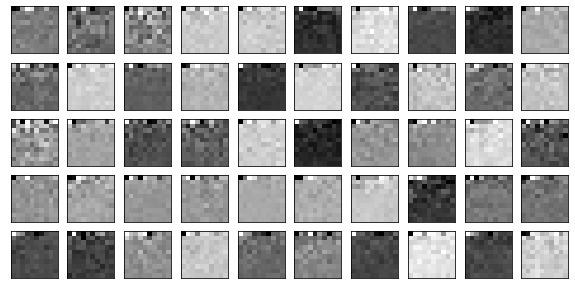

In [15]:
#차원축소 후 이미지를 랜덤인덱스로부터 50개 그려보기
reduced_images = reduced_x_train.reshape(-1, 10, 10)

plot_images(5, 10, reduced_images[random_index:random_index+50])

<Figure size 432x288 with 0 Axes>

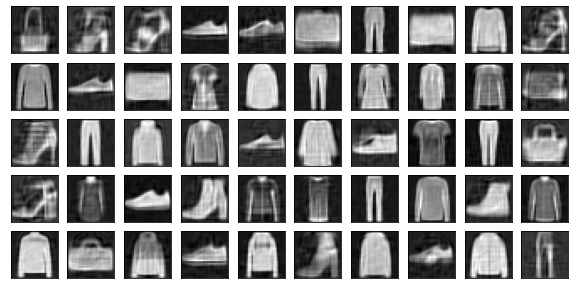

In [16]:
#압축된 데이터가 원래의 정보를 잘 담고있는지 확인하기 위해 복원해보기
recovered_images = pca.inverse_transform(reduced_x_train)
recovered_images = recovered_images.reshape(-1, 28, 28)

plot_images(5, 10, recovered_images[random_index:random_index+50])
#원본에 비해 조금 흐려졌지만, 특징을 잘 보존하고 있음

<Figure size 432x288 with 0 Axes>

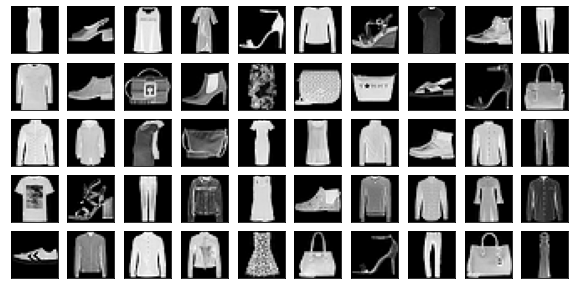

In [17]:
#과적합됐는지 확인하기 위해 검증데이터 압축 후 복원해보기
random_index = np.random.randint(0, len(x_test)-50)
samples = x_test[random_index:random_index+50]

plot_images(5, 10, samples)

원본 데이터 형태 : (10000, 28, 28)
데이터 펼친 후 형태 : (10000, 784)
PCA 후 형태 : (10000, 100)


<Figure size 432x288 with 0 Axes>

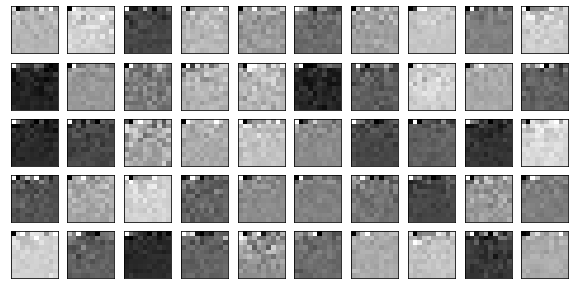

In [18]:
print(f'원본 데이터 형태 : {x_test.shape}')
x_test_flat = x_test.reshape(-1, 28*28)
print(f'데이터 펼친 후 형태 : {x_test_flat.shape}')

#검증데이터는 학습시키지 않도록 fit_transform 대신 transform 사용
reduced_x_test = pca.transform(x_test_flat)
print(f'PCA 후 형태 : {reduced_x_test.shape}')  

reduced_images = reduced_x_test.reshape(-1, 10, 10)
plot_images(5, 10, reduced_images[random_index:random_index+50])

<Figure size 432x288 with 0 Axes>

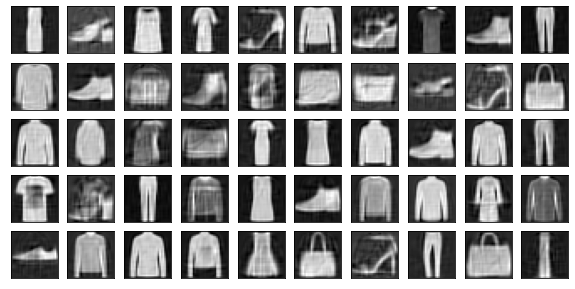

In [19]:
recovered_images = pca.inverse_transform(reduced_x_test)
recovered_images = recovered_images.reshape(-1, 28, 28)

plot_images(5, 10, recovered_images[random_index:random_index+50])
#학습되지 않은 데이터에 대해서도 원래의 정보를 잘 보존해 압축/복원됨

<Figure size 432x288 with 0 Axes>

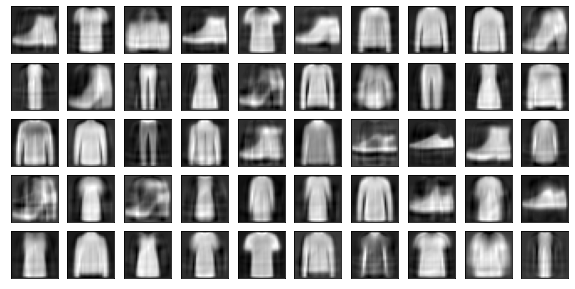

In [24]:
#10*10 보다 더 작은 크기로 압축해보면?
random_index = np.random.randint(0, len(x_train)-50)
samples = x_train[random_index:random_index+50]

x_train_flat = x_train.reshape(-1, 28*28)
pca = PCA(n_components=5*5)

reduced_x_train = pca.fit_transform(x_train_flat)

recovered_images = pca.inverse_transform(reduced_x_train)
recovered_images = recovered_images.reshape(-1, 28, 28)

plot_images(5, 10, recovered_images[random_index:random_index+50])
#역시 특징을 잘 유지하고 있다.